In [1]:
from matplotlib import pyplot as plt
%matplotlib widget
from eitprocessing.datahandling.continuousdata import ContinuousData
from eitprocessing.datahandling.loading import load_eit_data
from eitprocessing.filters.butterworth_filters import LowPassFilter
from eitprocessing.features.breath_detection import BreathDetection
from eitprocessing.datahandling.eitdata import EITData
MINUTE = 60
FRAMERATE = 20

In [2]:
sequence = load_eit_data(
    "/Users/juliettefrancovich/Desktop/1473122_01_001_01.bin", vendor="draeger"
)

In [3]:
gi = sequence.continuous_data["global_impedance_(raw)"]

filter_params = {
    "sample_frequency": sequence.eit_data["raw"].framerate,
    "cutoff_frequency": 50 / MINUTE,
    "order": 10,
}
filter_ = LowPassFilter(**filter_params)

sequence.continuous_data.add(
    ContinuousData(
        "global_impedance_(lowpass)",
        "Global impedance (low pass filtered)",
        "a.u.",
        "impedance",
        derived_from=[*gi.derived_from, gi],
        parameters={LowPassFilter: filter_params},
        time=gi.time,
        values=filter_.apply_filter(gi.values),
    ),
)

In [4]:
pixel_impedance = sequence.eit_data["raw"].pixel_impedance

In [5]:
pixel_impedance = sequence.eit_data["raw"].pixel_impedance

filter_params = {
    "sample_frequency": sequence.eit_data["raw"].framerate,
    "cutoff_frequency": 50 / MINUTE,
    "order": 10,
}
filter_ = LowPassFilter(**filter_params)


filtered_pixel_impedance = filter_.apply_filter(pixel_impedance, axis=0)

In [6]:
sequence.eit_data.add(
    EITData(
        path="/Users/juliettefrancovich/Documents/KT/TM2/EMC stage 1/Data/C031.bin",
        nframes=581,
        time=sequence.eit_data["raw"].time,
        framerate=sequence.eit_data["raw"].framerate,
        vendor="draeger",
        label="low pass filtered",
        pixel_impedance=filtered_pixel_impedance,
    )
)

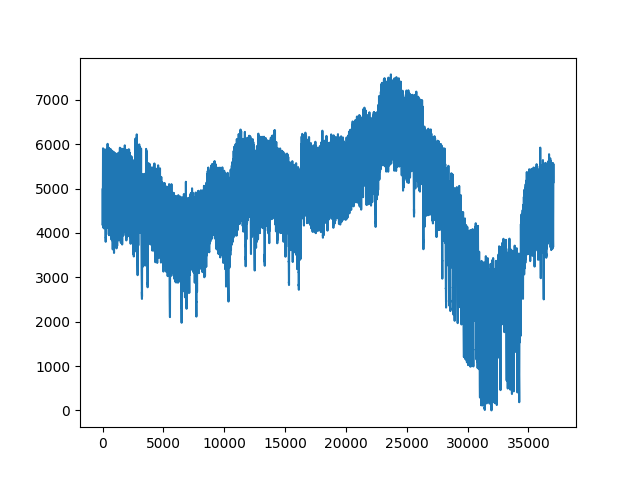

In [7]:
plt.figure()
plt.plot(sequence.continuous_data['global_impedance_(raw)'])

In [8]:
sequence = sequence[1000:2200]

In [9]:
bd = BreathDetection(sample_frequency=FRAMERATE)
breaths = bd.find_breaths(sequence, 'global_impedance_(lowpass)')

In [10]:
breaths.values

[Breath(start_time=53552.54, middle_time=53553.69, end_time=53555.09),
 Breath(start_time=53555.09, middle_time=53556.29, end_time=53557.79),
 Breath(start_time=53557.79, middle_time=53558.99, end_time=53560.49),
 Breath(start_time=53560.49, middle_time=53561.74, end_time=53563.09),
 Breath(start_time=53563.09, middle_time=53564.29, end_time=53565.49),
 Breath(start_time=53565.49, middle_time=53566.74, end_time=53568.14),
 Breath(start_time=53568.14, middle_time=53569.34, end_time=53570.64),
 Breath(start_time=53570.64, middle_time=53571.89, end_time=53573.09),
 Breath(start_time=53573.09, middle_time=53574.24, end_time=53575.74),
 Breath(start_time=53575.74, middle_time=53576.99, end_time=53578.29),
 Breath(start_time=53578.29, middle_time=53579.49, end_time=53580.99),
 Breath(start_time=53580.99, middle_time=53582.24, end_time=53583.44),
 Breath(start_time=53583.44, middle_time=53584.69, end_time=53585.99),
 Breath(start_time=53585.99, middle_time=53587.14, end_time=53588.34),
 Breat

In [16]:
import numpy as np
# fig, axs = plt.subplots(2, sharex= True)

# axs[0].plot(sequence.continuous_data['global_impedance_(lowpass)'])
pixel_inflations = np.zeros((32,32))
for row in range(15,16):
    for col in range(15,16):
        inflation_start = []
        for i in range(0,len(breaths)-1):
            mid_to_mid_sequence = sequence.t[breaths.values[i].middle_time:breaths.values[i+1].middle_time]
            inflation_start.append(np.argmin(mid_to_mid_sequence.eit_data['low pass filtered'].pixel_impedance[:,row,col]))



        # plt.plot(mid_to_mid_sequence.eit_data['low pass filtered'].pixel_impedance[:,row,col])


TypeError: slice indices must be integers or None or have an __index__ method

In [15]:
inflation_start

[22,
 25,
 23,
 21,
 18,
 21,
 19,
 18,
 24,
 20,
 24,
 18,
 20,
 18,
 16,
 18,
 20,
 24,
 20,
 21,
 21]

In [ ]:
breaths.values[i].middle_time

53604.44